In [94]:
import pandas as pd
import numpy as np

%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [100]:
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

In [86]:
df = pd.read_csv('swm.csv', sep=';')

In [87]:
df.head()

,км,бпФизагр,бпГнев,бпВраждебность,шаОтрицательное отношение к государству,шаПереоценка значимости денег,шпсF1,шпсF2,ш21Безопасность,Конформизм,...,шасМотивация,шасВлияние семьи,шасСложность,шасМетакогнитивный аспект,шасВлияние социума,шнНеуверенность,штнНовизна,штнСложность,штнНерешенность,штнОбщий
0,2,19.0,21.0,18.0,NaN,NaN,NaN,NaN,9.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,18.0,22.0,21.0,NaN,NaN,NaN,NaN,9.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,21.0,33.0,30.0,NaN,NaN,NaN,NaN,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,18.0,16.0,17.0,NaN,NaN,NaN,NaN,9.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Удаляем данные с пропусками (колонки и строки)

In [89]:
df = df.dropna(axis=1,thresh=df.shape[1]*0.5)

In [90]:
df = df.dropna(axis=0,thresh=df.shape[1]*0.7)

## Рисуем распределения значений

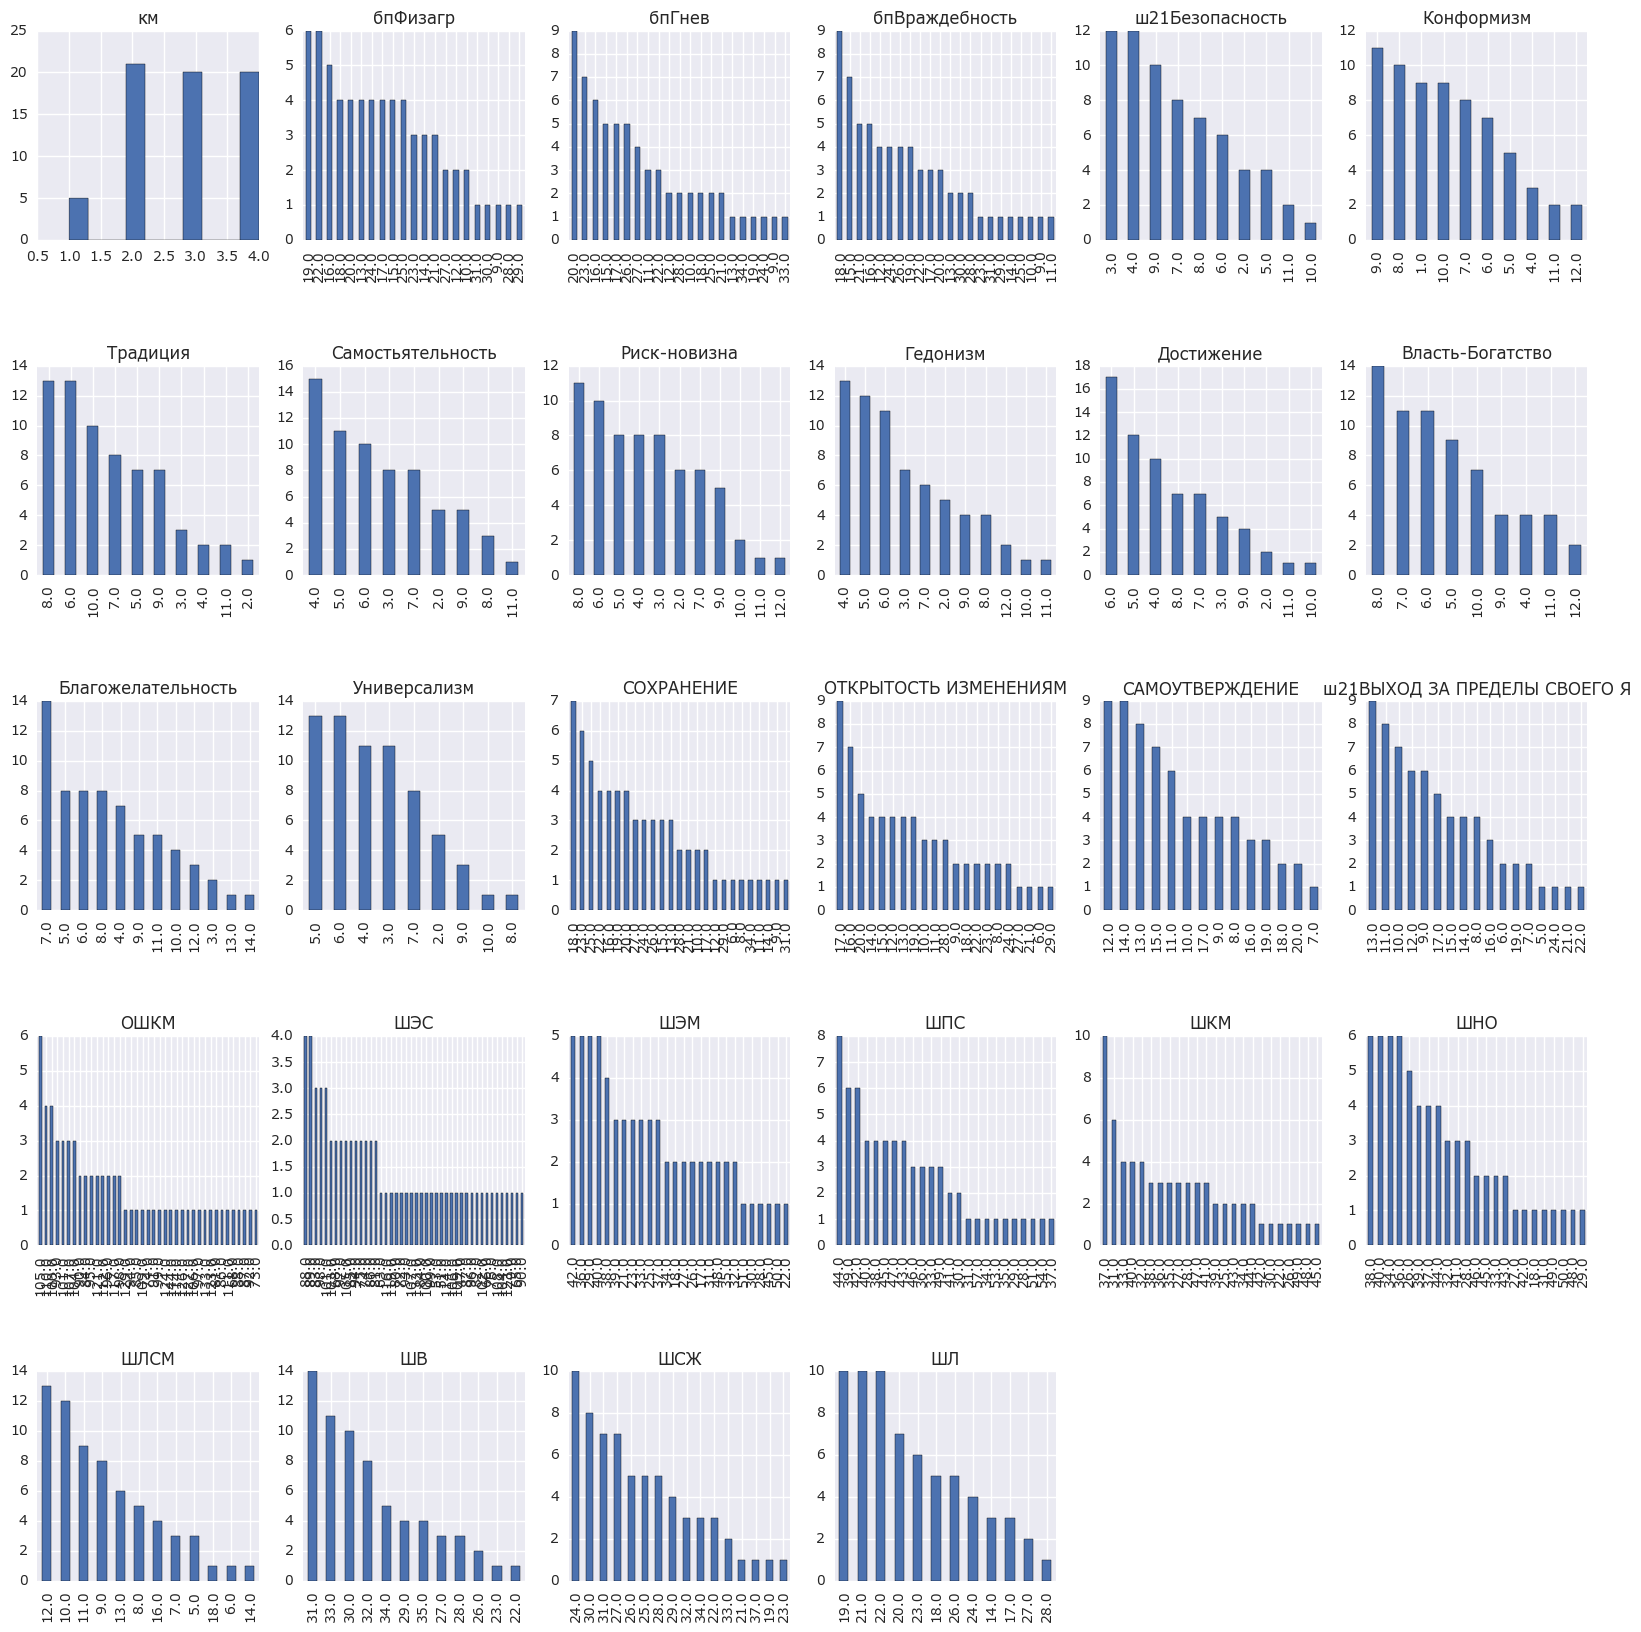

In [102]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=.6)

for i, col in enumerate(df.columns):
    ax = fig.add_subplot(5, 6, i + 1)
    ax.set_title(col)
    if(df[col].dtype == np.int64):
          df[col].hist(axes=ax)
    else:
         df[col].value_counts().plot(kind="bar", axes=ax)

## Рисуем некоторые попарные графики с цветами по признаку "км"

C:\Users\sanek\Anaconda3\lib\site-packages\numpy\lib\function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\sanek\Anaconda3\lib\site-packages\numpy\lib\function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


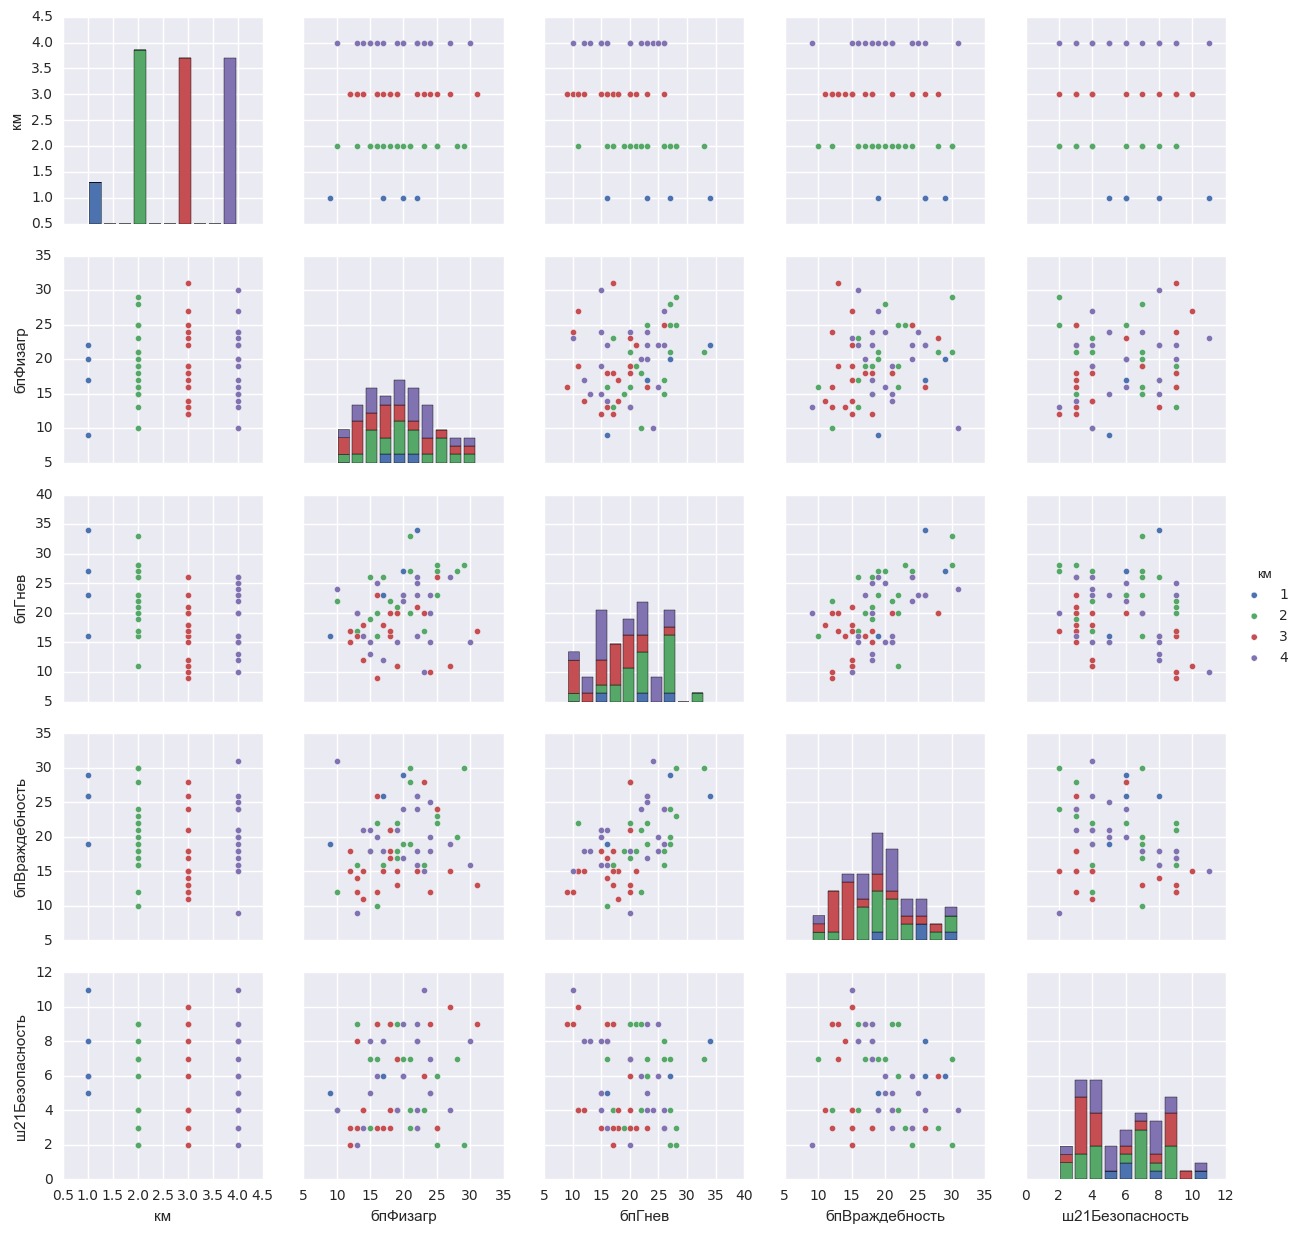

In [67]:
sns.pairplot(df[list(range(0,5))], hue="км")

## Смотрим корреляции по Пирсону для всей матрицы данных

In [68]:
corr = df.corr(method='pearson')

In [69]:
corr

,км,бпФизагр,бпГнев,бпВраждебность,ш21Безопасность,Конформизм,Традиция,Самостьятельность,Риск-новизна,Гедонизм,...,ОШКМ,ШЭС,ШЭМ,ШПС,ШКМ,ШНО,ШЛСМ,ШВ,ШСЖ,ШЛ
км,1.000000,0.071097,-0.326672,-0.163899,-0.066101,-0.087950,-0.095167,-0.003930,-0.128729,0.031866,...,0.073416,0.097143,-0.050889,-0.117564,-0.031417,-0.152629,-0.096290,0.055769,0.204446,0.087365
бпФизагр,0.071097,1.000000,0.220340,0.223559,0.168919,0.150369,0.206172,0.102735,-0.047870,-0.001121,...,-0.067915,-0.092441,-0.097917,-0.226105,0.200262,-0.255573,0.030818,-0.144504,0.005541,-0.095287
бпГнев,-0.326672,0.220340,1.000000,0.558589,-0.197683,-0.026756,0.057385,0.160057,0.144205,-0.108874,...,-0.505618,-0.529545,0.167039,0.101080,0.264738,0.182804,0.385257,-0.104414,-0.184200,-0.170232
бпВраждебность,-0.163899,0.223559,0.558589,1.000000,-0.228866,0.001476,-0.074504,-0.032624,0.232390,-0.095336,...,-0.599028,-0.495975,0.173757,-0.058118,0.599456,0.137321,0.414338,-0.122004,-0.342616,-0.162635
ш21Безопасность,-0.066101,0.168919,-0.197683,-0.228866,1.000000,0.507111,0.187823,0.214727,0.061634,0.269329,...,0.484710,0.500916,-0.176613,-0.141439,-0.239347,-0.056437,-0.298948,-0.156721,0.099088,0.057388
Конформизм,-0.087950,0.150369,-0.026756,0.001476,0.507111,1.000000,0.325781,0.247091,0.184850,0.035631,...,0.195625,0.226372,-0.001701,-0.089302,0.087897,-0.149987,-0.084478,-0.096372,0.015316,0.040305
Традиция,-0.095167,0.206172,0.057385,-0.074504,0.187823,0.325781,1.000000,0.062280,0.266167,0.151557,...,0.049308,0.007785,-0.042170,-0.090254,-0.039239,-0.231599,-0.032251,-0.002367,0.039160,-0.187663
Самостьятельность,-0.003930,0.102735,0.160057,-0.032624,0.214727,0.247091,0.062280,1.000000,0.353926,0.289831,...,0.058183,0.065029,0.046906,0.226056,-0.029552,0.306294,-0.030467,0.031508,-0.037268,0.175606
Риск-новизна,-0.128729,-0.047870,0.144205,0.232390,0.061634,0.184850,0.266167,0.353926,1.000000,0.447317,...,-0.079642,-0.066126,-0.081526,-0.119225,0.102590,0.082171,0.111909,0.158435,-0.053095,-0.101597
Гедонизм,0.031866,-0.001121,-0.108874,-0.095336,0.269329,0.035631,0.151557,0.289831,0.447317,1.000000,...,0.096387,0.101910,-0.217311,-0.165868,-0.101350,-0.230158,-0.076539,-0.018249,0.195072,0.039477


In [70]:
table = corr.mask(np.triu(np.ones(corr.shape)).astype(np.bool))
z = pd.DataFrame(table.stack())
z.columns = ['corr']
z['abs']= z['corr'].abs()

In [71]:
z_sort = z.sort_values(by='abs', ascending=False)
z_sort.drop('abs', axis=1, inplace=True)
z_sort[:20]

,,corr
ШЭС,ОШКМ,0.922505
ш21ВЫХОД ЗА ПРЕДЕЛЫ СВОЕГО Я,Благожелательность,0.908813
СОХРАНЕНИЕ,Конформизм,0.857557
ш21ВЫХОД ЗА ПРЕДЕЛЫ СВОЕГО Я,Универсализм,0.818915
САМОУТВЕРЖДЕНИЕ,Власть-Богатство,0.810819
ОТКРЫТОСТЬ ИЗМЕНЕНИЯМ,Риск-новизна,0.810483
САМОУТВЕРЖДЕНИЕ,Достижение,0.774865
ОТКРЫТОСТЬ ИЗМЕНЕНИЯМ,Гедонизм,0.774618
СОХРАНЕНИЕ,ш21Безопасность,0.764680
ОТКРЫТОСТЬ ИЗМЕНЕНИЯМ,Самостьятельность,0.688693


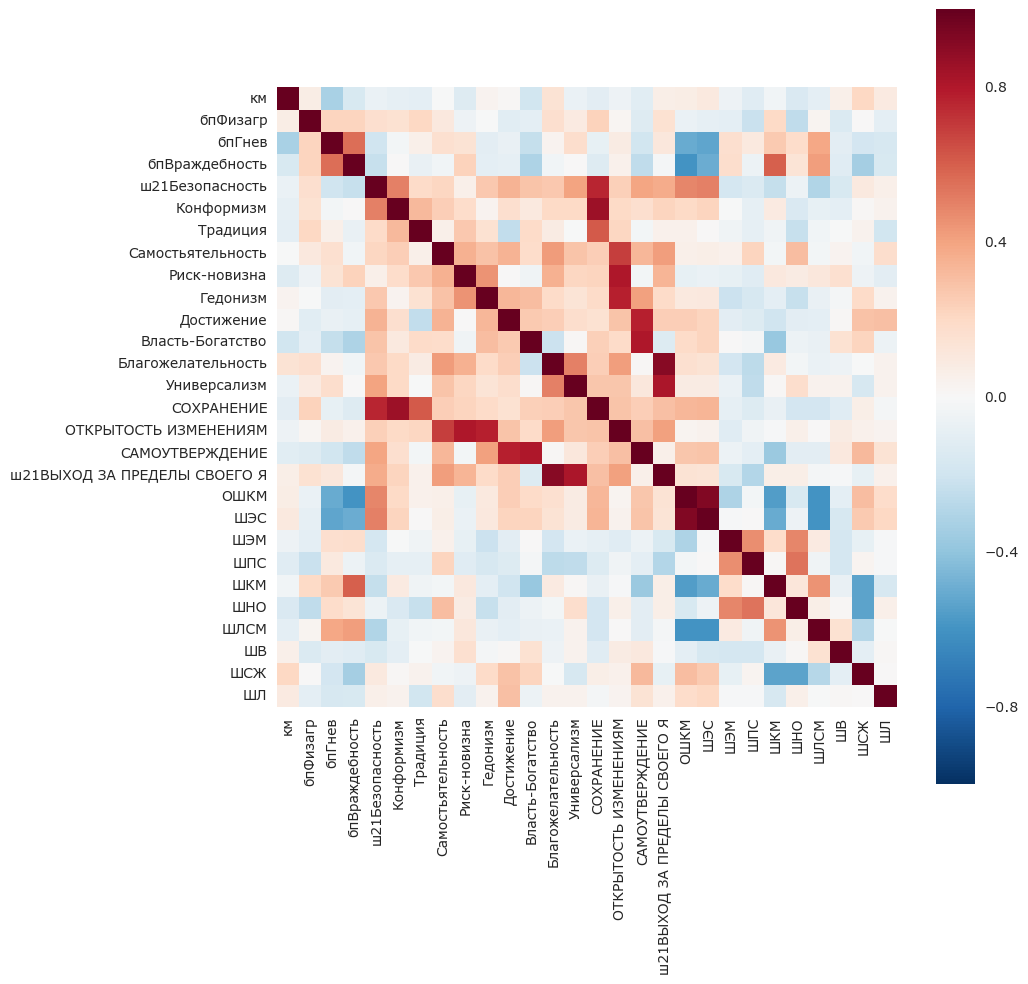

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square = True, ax=ax)

## Смотрим корреляции по Пирсону для каждой группы по "км"

## Корреляции для "км"==1

In [116]:
corr1 = df[df['км']==1].corr(method='pearson')
corr1

,км,бпФизагр,бпГнев,бпВраждебность,ш21Безопасность,Конформизм,Традиция,Самостьятельность,Риск-новизна,Гедонизм,...,ОШКМ,ШЭС,ШЭМ,ШПС,ШКМ,ШНО,ШЛСМ,ШВ,ШСЖ,ШЛ
км,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
бпФизагр,NaN,1.000000,0.952945,0.893518,0.834282,0.974632,0.808122,-0.349927,-0.383326,-0.583212,...,-0.957587,-0.979176,-0.932559,-0.764383,0.400941,-0.349927,0.808122,-0.769081,-0.583212,-0.375643
бпГнев,NaN,0.952945,1.000000,0.720158,0.950151,0.924995,0.843661,-0.177123,-0.509325,-0.797053,...,-0.833741,-0.872516,-0.783577,-0.860538,0.104643,-0.177123,0.639137,-0.811804,-0.678971,-0.129641
бпВраждебность,NaN,0.893518,0.720158,1.000000,0.499512,0.902671,0.680414,-0.628539,-0.043033,-0.157135,...,-0.953488,-0.957261,-0.971537,-0.550378,0.759555,-0.628539,0.861858,-0.505399,-0.261891,-0.598057
ш21Безопасность,NaN,0.834282,0.950151,0.499512,1.000000,0.955134,0.940480,0.859334,0.644917,0.650011,...,0.706897,0.586727,-0.827689,0.529378,-0.776032,0.407240,-0.678651,-0.611325,0.712096,-0.515122
Конформизм,NaN,0.974632,0.924995,0.902671,0.955134,1.000000,0.984658,0.815616,0.800250,0.780625,...,0.740102,0.614288,-0.885740,0.587040,-0.691669,0.193804,-0.710530,-0.442498,0.829630,-0.600606
Традиция,NaN,0.808122,0.843661,0.680414,0.940480,0.984658,1.000000,0.782780,0.814835,0.745356,...,0.748055,0.624250,-0.821010,0.519027,-0.731076,0.144338,-0.748831,-0.367806,0.834966,-0.456435
Самостьятельность,NaN,-0.349927,-0.177123,-0.628539,0.859334,0.815616,0.782780,1.000000,0.732601,0.822665,...,0.920874,0.876876,-0.563315,0.851762,-0.903309,0.677908,-0.867532,-0.331674,0.828431,-0.503777
Риск-новизна,NaN,-0.383326,-0.509325,-0.043033,0.644917,0.800250,0.814835,0.732601,1.000000,0.950057,...,0.885439,0.833904,-0.541008,0.763390,-0.663787,0.050405,-0.880394,0.169545,0.987736,-0.422395
Гедонизм,NaN,-0.583212,-0.797053,-0.157135,0.650011,0.780625,0.745356,0.822665,0.950057,1.000000,...,0.906780,0.869609,-0.566714,0.914809,-0.653894,0.242061,-0.851172,0.065795,0.968527,-0.612372


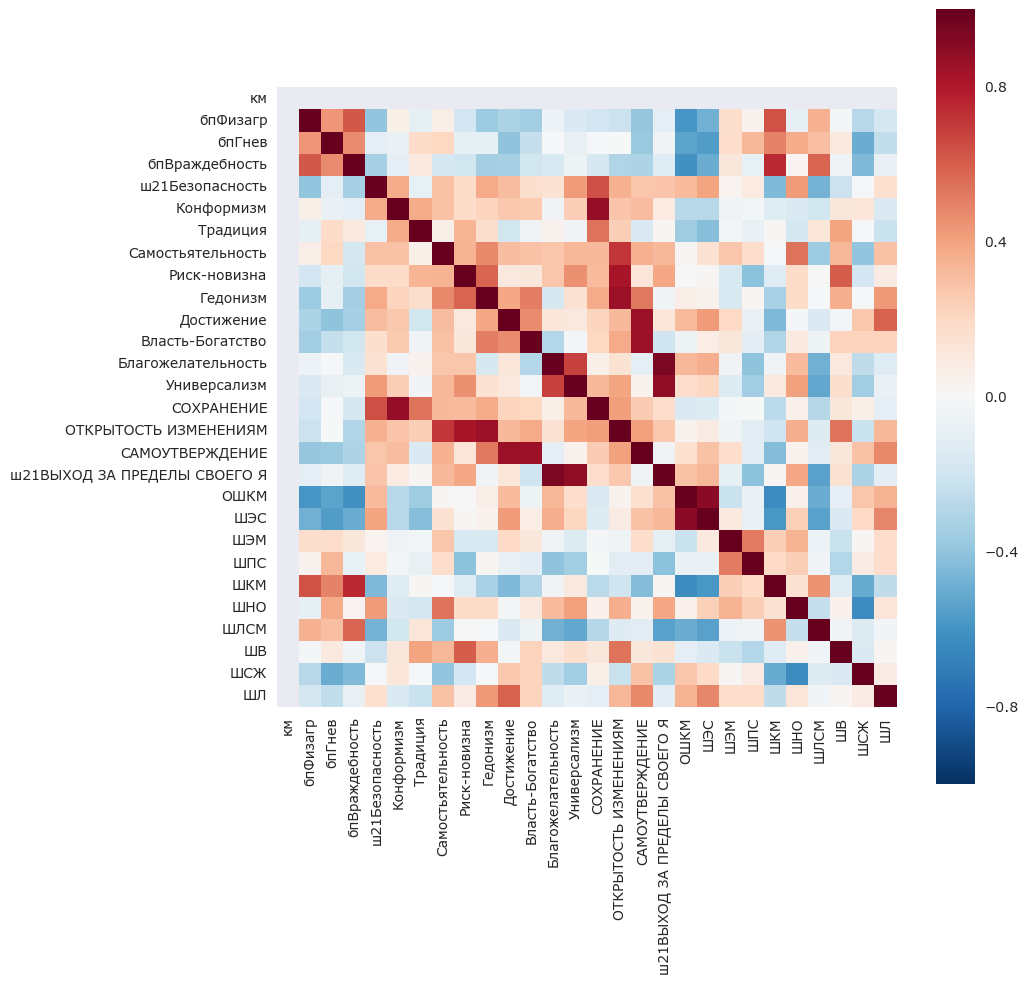

In [117]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr2, square = True, ax=ax)

## Корреляции для "км"==2

In [118]:
corr2 = df[df['км']==2].corr(method='pearson')
corr2

,км,бпФизагр,бпГнев,бпВраждебность,ш21Безопасность,Конформизм,Традиция,Самостьятельность,Риск-новизна,Гедонизм,...,ОШКМ,ШЭС,ШЭМ,ШПС,ШКМ,ШНО,ШЛСМ,ШВ,ШСЖ,ШЛ
км,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
бпФизагр,NaN,1.000000,0.438394,0.618414,-0.397851,0.054691,-0.091715,0.066555,-0.182070,-0.359464,...,-0.590331,-0.483497,0.172652,0.041077,0.634637,-0.088314,0.358790,-0.016620,-0.275642,-0.176391
бпГнев,NaN,0.438394,1.000000,0.473534,-0.101178,-0.064938,0.192447,0.208296,-0.090144,-0.087242,...,-0.537300,-0.558611,0.182510,0.329199,0.493044,0.371907,0.301799,0.095319,-0.494600,-0.248152
бпВраждебность,NaN,0.618414,0.473534,1.000000,-0.330243,-0.096865,0.100780,-0.177919,-0.188909,-0.343240,...,-0.605103,-0.499311,0.110592,-0.081751,0.755966,0.024972,0.585737,-0.045383,-0.442672,-0.075917
ш21Безопасность,NaN,-0.397851,-0.101178,-0.330243,1.000000,0.370005,-0.079203,0.293755,0.189811,0.381441,...,0.316140,0.399836,0.027666,0.091036,-0.441396,0.427263,-0.473266,-0.216610,-0.009111,0.156313
Конформизм,NaN,0.054691,-0.064938,-0.096865,0.370005,1.000000,0.369217,0.293094,0.187730,0.225820,...,-0.276699,-0.280792,-0.042667,-0.029654,-0.117956,-0.148238,-0.192755,0.112659,0.122134,-0.148159
Традиция,NaN,-0.091715,0.192447,0.100780,-0.079203,0.369217,1.000000,0.057797,0.337528,0.179633,...,-0.359316,-0.422835,-0.029719,-0.077249,0.011282,-0.172702,0.121838,0.402492,-0.012178,-0.226215
Самостьятельность,NaN,0.066555,0.208296,-0.177919,0.293755,0.293094,0.057797,1.000000,0.346767,0.480111,...,0.011911,0.152510,0.280293,0.182577,-0.009224,0.540822,-0.362649,0.331680,-0.395503,0.291993
Риск-новизна,NaN,-0.182070,-0.090144,-0.188909,0.189811,0.187730,0.337528,0.346767,1.000000,0.583828,...,0.003684,0.013233,-0.162366,-0.407839,-0.121879,0.191025,0.002369,0.601808,-0.180200,0.078905
Гедонизм,NaN,-0.359464,-0.087242,-0.343240,0.381441,0.225820,0.179633,0.480111,0.583828,1.000000,...,0.063957,0.045618,-0.156390,0.018428,-0.326076,0.191970,-0.009741,0.361195,-0.008187,0.436973


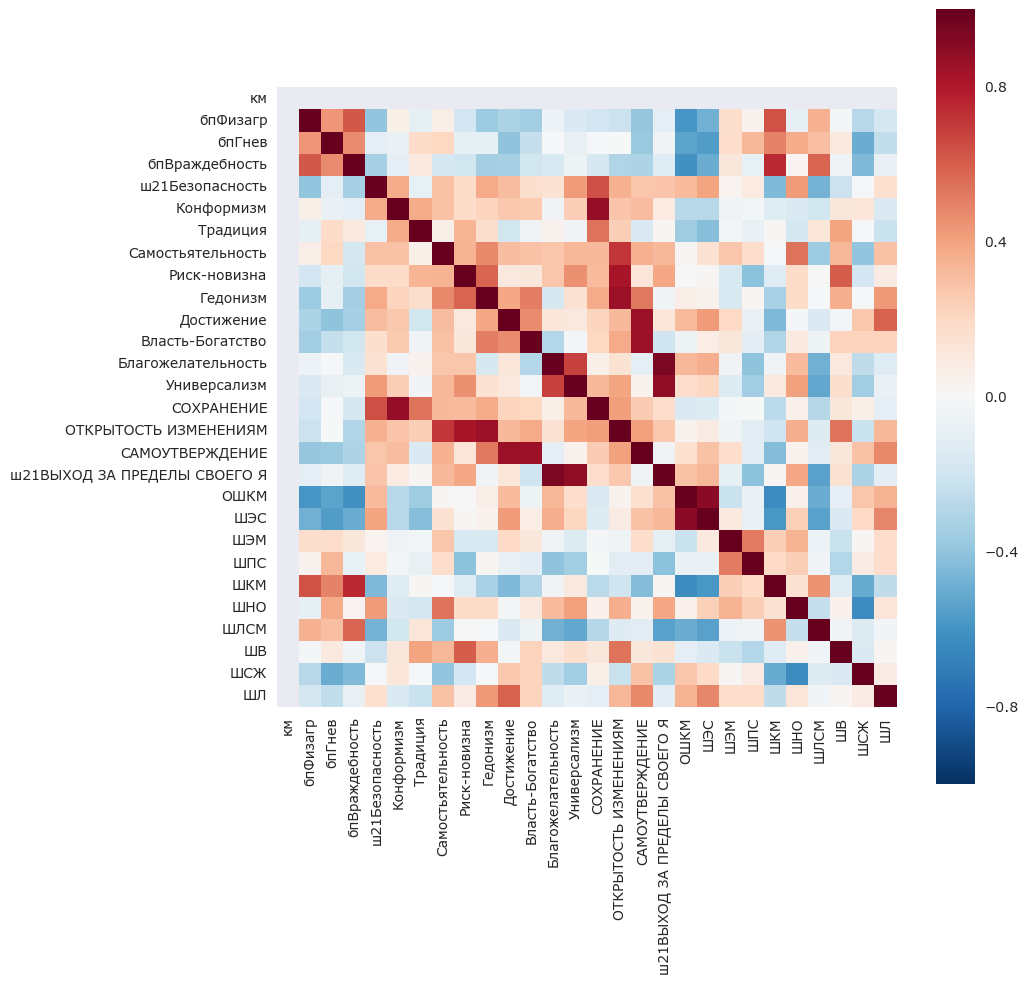

In [119]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr2, square = True, ax=ax)

## Корреляции для "км"==3

In [111]:
corr3 = df[df['км']==3].corr(method='pearson')
corr3

,км,бпФизагр,бпГнев,бпВраждебность,ш21Безопасность,Конформизм,Традиция,Самостьятельность,Риск-новизна,Гедонизм,...,ОШКМ,ШЭС,ШЭМ,ШПС,ШКМ,ШНО,ШЛСМ,ШВ,ШСЖ,ШЛ
км,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
бпФизагр,NaN,1.000000,0.038814,0.140431,4.811323e-01,0.275812,0.572990,-0.183642,0.133374,2.761754e-01,...,0.110701,0.159229,-0.046964,-0.579477,0.126922,-0.449094,-0.151577,-0.311587,0.051811,-0.382427
бпГнев,NaN,0.038814,1.000000,0.551931,-5.207905e-01,-0.576185,-0.308215,-0.078870,0.305366,-3.557210e-02,...,-0.640339,-0.623348,0.291698,0.283401,0.220189,0.285861,0.494753,-0.215327,0.068121,-0.189426
бпВраждебность,NaN,0.140431,0.551931,1.000000,-2.989946e-01,-0.327871,-0.087005,0.292835,0.628532,3.538431e-01,...,-0.477737,-0.361003,0.273466,0.275968,0.472321,0.364515,0.298341,-0.407989,-0.317948,-0.318487
ш21Безопасность,NaN,0.481132,-0.520790,-0.298995,1.000000e+00,0.672358,0.371830,-0.214844,-0.302267,-2.430914e-17,...,0.657620,0.714558,-0.157165,-0.517387,-0.030013,-0.343543,-0.543349,-0.136859,-0.047290,-0.177846
Конформизм,NaN,0.275812,-0.576185,-0.327871,6.723579e-01,1.000000,0.395306,0.070202,0.015576,-1.342238e-01,...,0.537817,0.574445,-0.120999,-0.198174,0.379434,-0.224980,-0.201487,-0.096003,-0.355123,0.068910
Традиция,NaN,0.572990,-0.308215,-0.087005,3.718297e-01,0.395306,1.000000,-0.186006,0.010894,2.297061e-01,...,0.151314,0.166275,-0.185776,-0.476624,0.075033,-0.429820,-0.086052,0.119411,0.017364,-0.133789
Самостьятельность,NaN,-0.183642,-0.078870,0.292835,-2.148436e-01,0.070202,-0.186006,1.000000,0.387628,-1.383128e-01,...,-0.385111,-0.413327,0.003794,0.178445,0.333711,0.323936,0.487864,0.250563,-0.463367,0.113340
Риск-новизна,NaN,0.133374,0.305366,0.628532,-3.022673e-01,0.015576,0.010894,0.387628,1.000000,3.711735e-01,...,-0.314515,-0.207266,0.245178,0.093848,0.358675,0.264923,0.383487,-0.101835,-0.378005,-0.168715
Гедонизм,NaN,0.276175,-0.035572,0.353843,-2.430914e-17,-0.134224,0.229706,-0.138313,0.371173,1.000000e+00,...,0.107067,0.156182,-0.136454,-0.378730,0.092313,-0.418568,-0.283097,-0.052738,0.139683,-0.470289


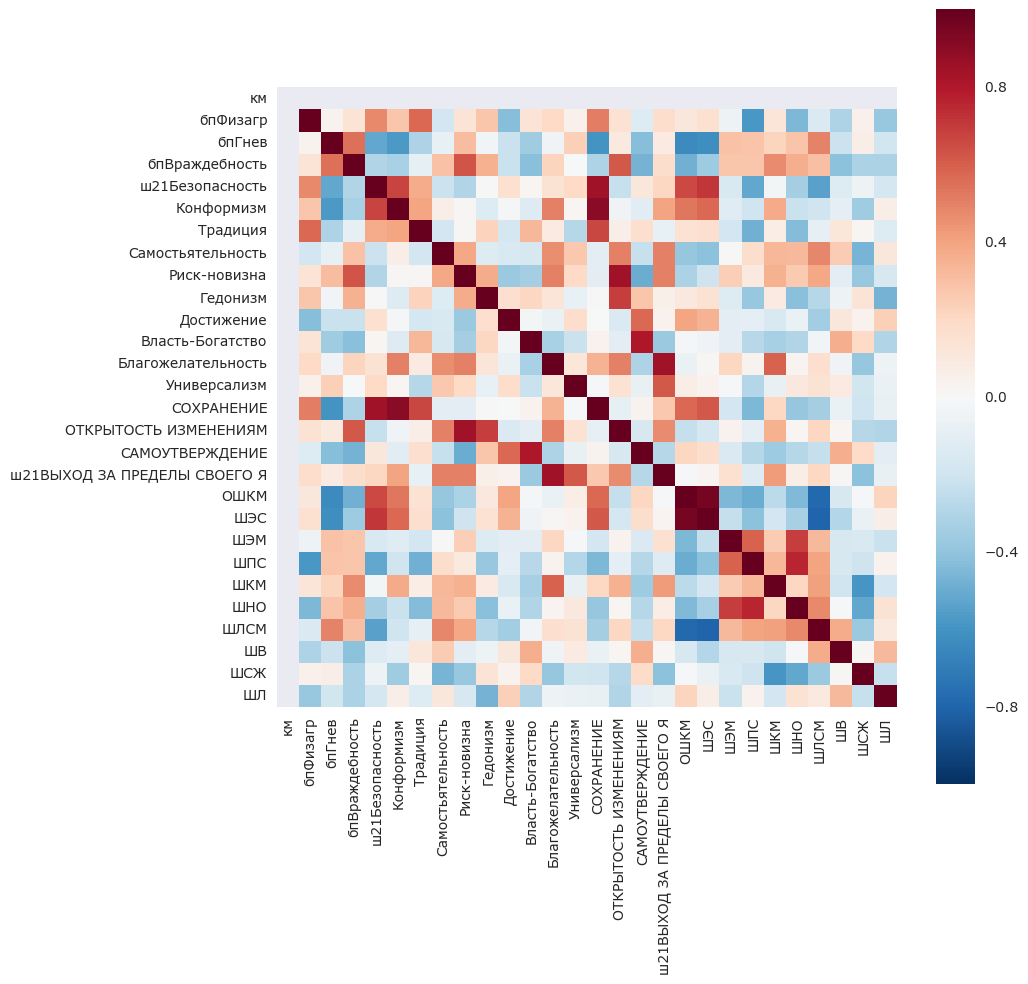

In [112]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr3, square = True, ax=ax)

## Корреляции для "км"==4

In [114]:
corr4 = df[df['км']==4].corr(method='pearson')
corr4

,км,бпФизагр,бпГнев,бпВраждебность,ш21Безопасность,Конформизм,Традиция,Самостьятельность,Риск-новизна,Гедонизм,...,ОШКМ,ШЭС,ШЭМ,ШПС,ШКМ,ШНО,ШЛСМ,ШВ,ШСЖ,ШЛ
км,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
бпФизагр,NaN,1.000000,0.053253,-0.157876,0.316624,-0.179758,0.014013,0.282618,-0.132920,0.093365,...,0.309921,0.134090,-0.321527,-0.162285,-0.267055,-0.191789,-0.301463,0.074132,0.275613,0.295618
бпГнев,NaN,0.053253,1.000000,0.399906,-0.377422,0.139832,0.325119,0.244338,0.235045,-0.166393,...,-0.238458,-0.359336,0.031511,-0.086119,-0.050509,-0.168576,0.010125,0.064992,0.220500,-0.185619
бпВраждебность,NaN,-0.157876,0.399906,1.000000,-0.353984,0.134480,-0.102383,-0.186162,0.441463,-0.214676,...,-0.702589,-0.673457,0.047826,-0.207724,0.630611,0.027349,0.070841,0.132655,-0.323673,-0.175767
ш21Безопасность,NaN,0.316624,-0.377422,-0.353984,1.000000,0.259491,0.123802,0.380662,-0.001949,0.464845,...,0.447797,0.346024,-0.423696,-0.263869,-0.102651,-0.336574,0.220068,-0.057894,0.213532,0.314060
Конформизм,NaN,-0.179758,0.139832,0.134480,0.259491,1.000000,0.258738,0.033976,-0.092648,-0.059391,...,0.109235,0.288249,0.228860,-0.295359,0.000000,-0.209714,0.030718,-0.259587,0.061166,0.329617
Традиция,NaN,0.014013,0.325119,-0.102383,0.123802,0.258738,1.000000,0.121231,0.301578,-0.022307,...,-0.020240,0.039414,0.255029,0.034133,-0.062419,-0.158582,0.121143,-0.335825,0.040645,-0.151311
Самостьятельность,NaN,0.282618,0.244338,-0.186162,0.380662,0.033976,0.121231,1.000000,0.070827,0.408627,...,0.172581,0.051789,-0.099769,0.217109,-0.281320,0.049165,-0.152641,-0.216086,0.435228,0.235984
Риск-новизна,NaN,-0.132920,0.235045,0.441463,-0.001949,-0.092648,0.301578,0.070827,1.000000,0.354912,...,-0.548122,-0.643523,-0.267585,-0.226547,0.397579,-0.324086,0.200643,0.065737,0.037925,-0.194864
Гедонизм,NaN,0.093365,-0.166393,-0.214676,0.464845,-0.059391,-0.022307,0.408627,0.354912,1.000000,...,-0.032308,-0.041182,-0.345256,-0.348390,0.015070,-0.570947,0.180616,-0.336096,0.475333,0.268477


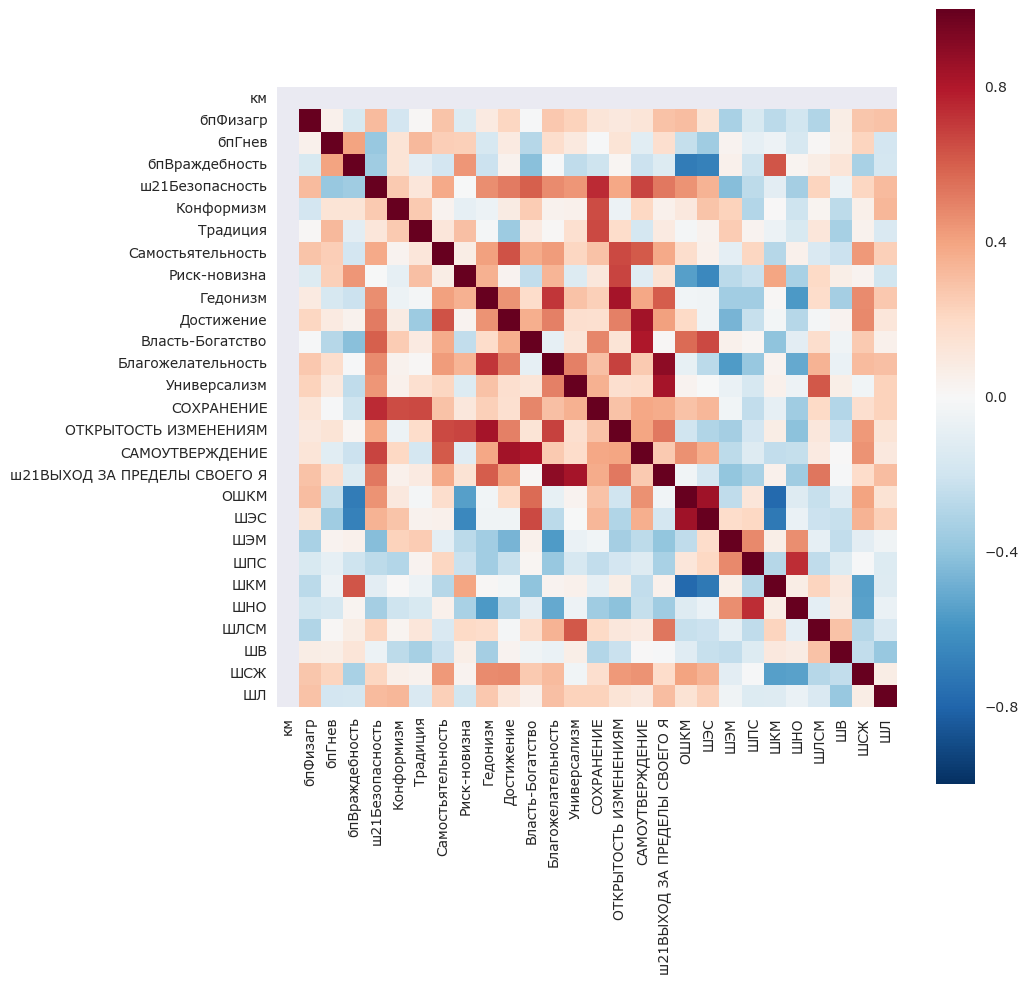

In [115]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr4, square = True, ax=ax)

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
clf = DecisionTreeClassifier()

In [125]:
df = df.dropna()

In [126]:
clf.fit(df.iloc[:,1:].values, df['км'].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [127]:
clf.feature_importances_

array([ 0.        ,  0.11800216,  0.25666835,  0.        ,  0.19386811,
        0.        ,  0.        ,  0.03631795,  0.        ,  0.        ,
        0.02920036,  0.03524901,  0.        ,  0.        ,  0.        ,
        0.06006931,  0.        ,  0.12827301,  0.03942049,  0.06643082,
        0.        ,  0.03650045,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [140]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
with open("swm.dot", 'w',encoding='utf-8') as f:
    f = export_graphviz(clf, out_file=f,feature_names=df.iloc[:,1:].columns,  
                         class_names=['км=1','км=2','км=3','км=4'],  
                         filled=True, rounded=True)